In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_n2 = pd.read_csv("ucf_metrics_summary_n2.csv")
df_n3 = pd.read_csv("ucf_metrics_summary_n3.csv")
df_n4 = pd.read_csv("ucf_metrics_summary_n4.csv")
df_n5 = pd.read_csv("ucf_metrics_summary_n5.csv")




dfs = {
    2: df_n2,
    3: df_n3,
    4: df_n4,
    5: df_n5
}

metrics = ['auc', 'nss', 'kl', 'cc', 'sim']

records = []

for n, df in dfs.items():
    time_window = n * 0.1  # seconds
    
    for _, row in df.iterrows():
        for metric in metrics:
            records.extend([
                {
                    'TimeWindow': time_window,
                    'Method': 'SR-Event',
                    'Metric': metric.upper(),
                    'Value': row[f'sr_{metric}']
                },
                {
                    'TimeWindow': time_window,
                    'Method': 'BMS-Event',
                    'Metric': metric.upper(),
                    'Value': row[f'bms_{metric}']
                },
                {
                    'TimeWindow': time_window,
                    'Method': 'SR-RGB',
                    'Metric': metric.upper(),
                    'Value': row[f'sr_rgb_{metric}']
                },
                {
                    'TimeWindow': time_window,
                    'Method': 'BMS-RGB',
                    'Metric': metric.upper(),
                    'Value': row[f'bms_rgb_{metric}']
                }
            ])

df_tw = pd.DataFrame(records)


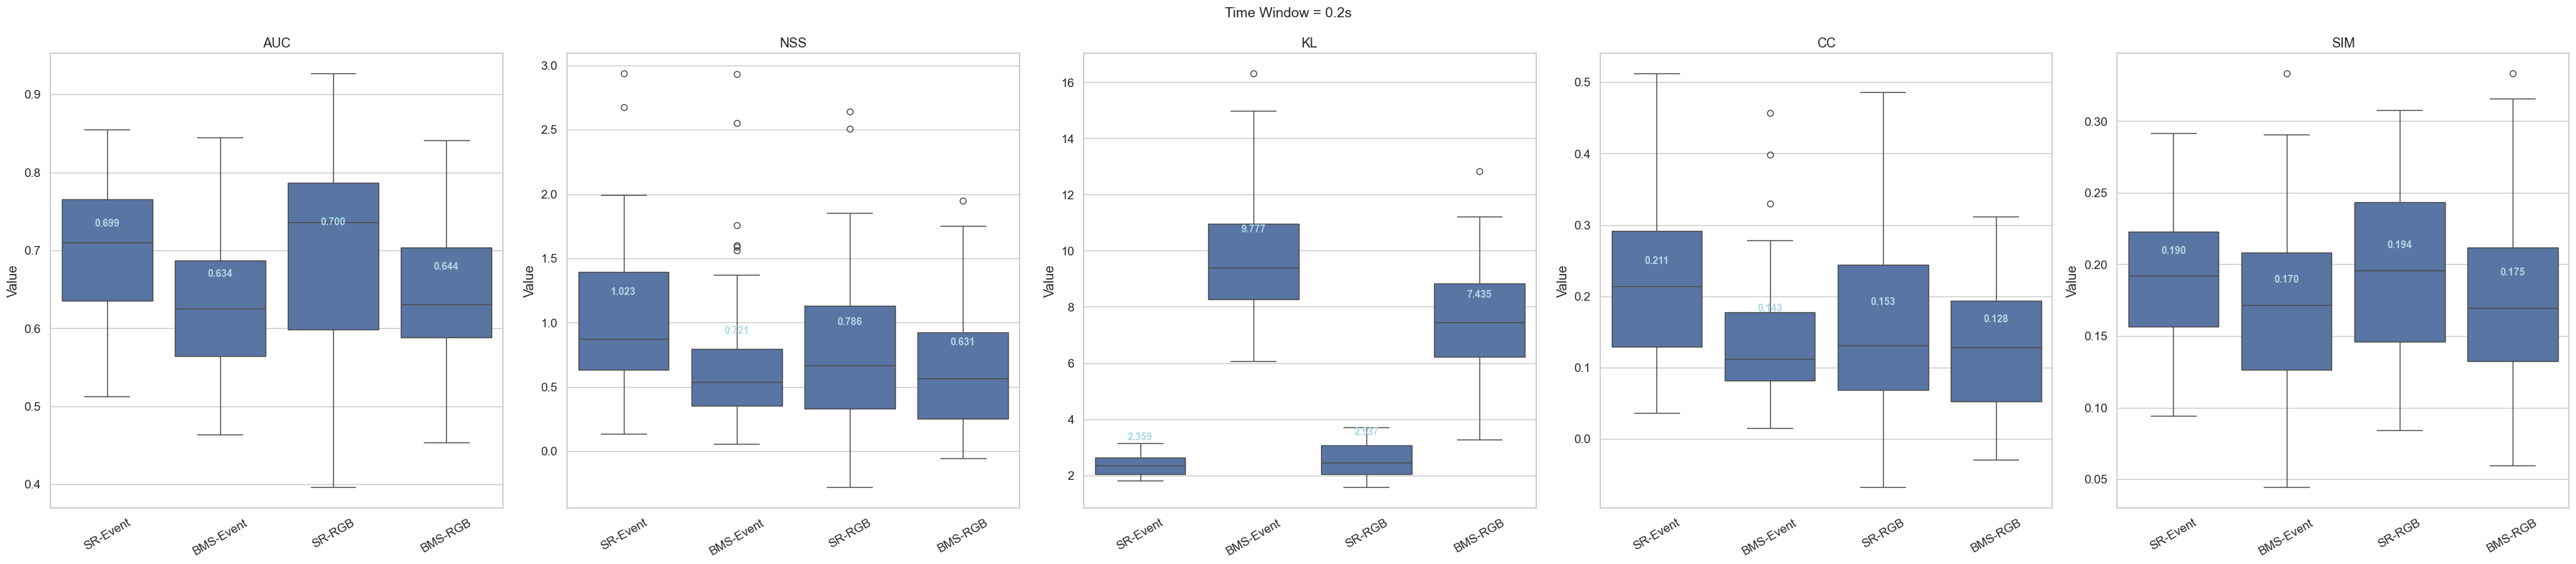

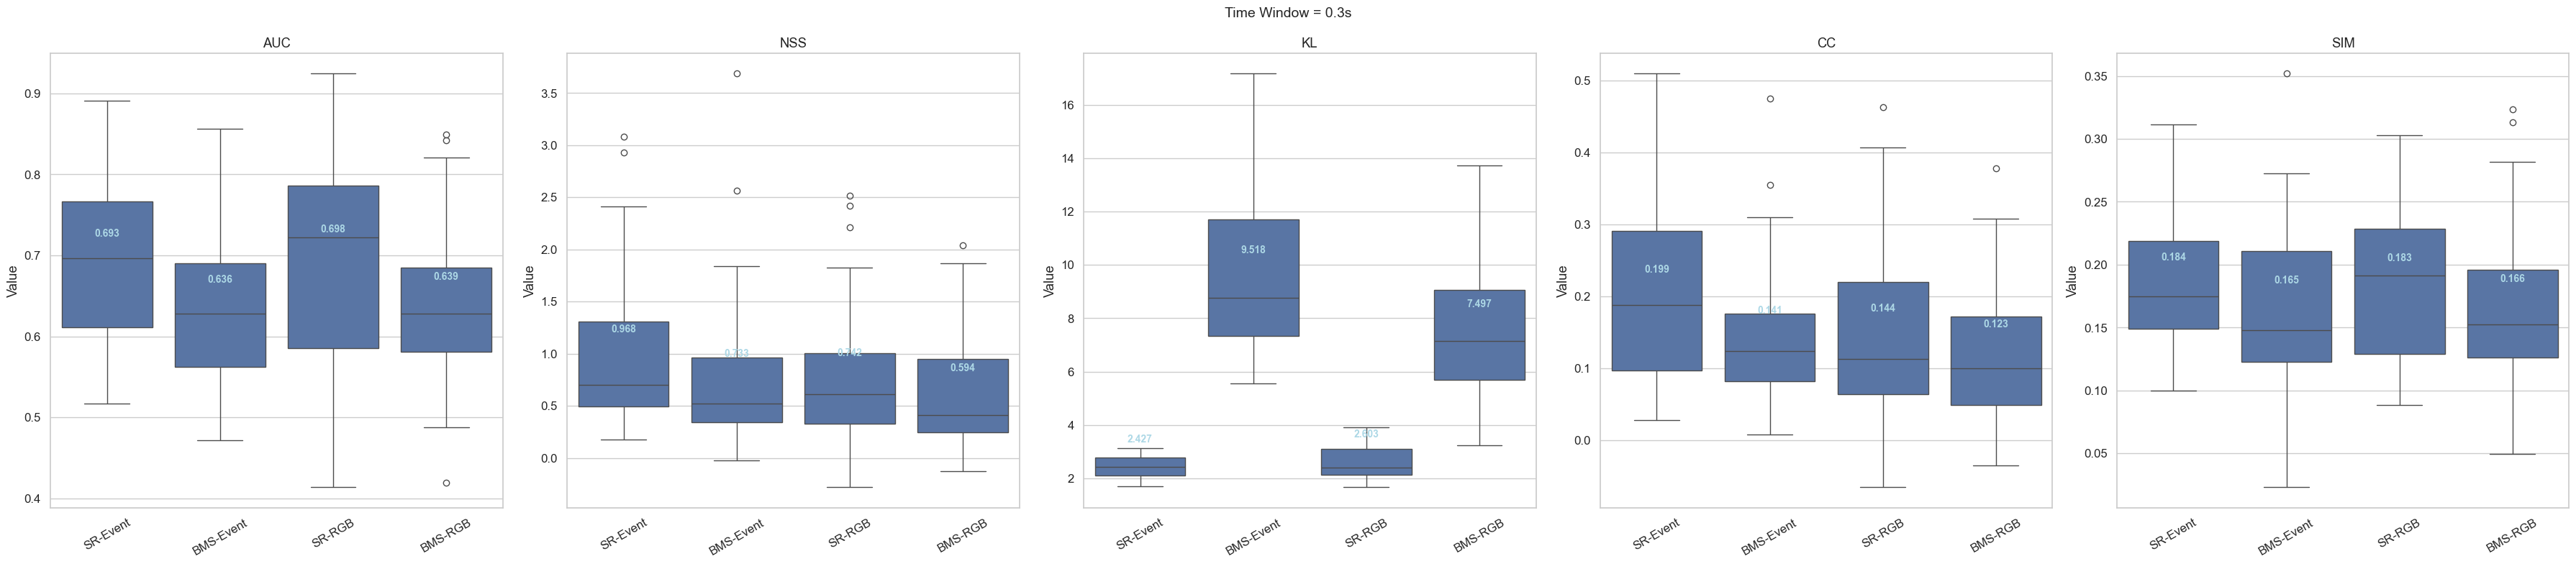

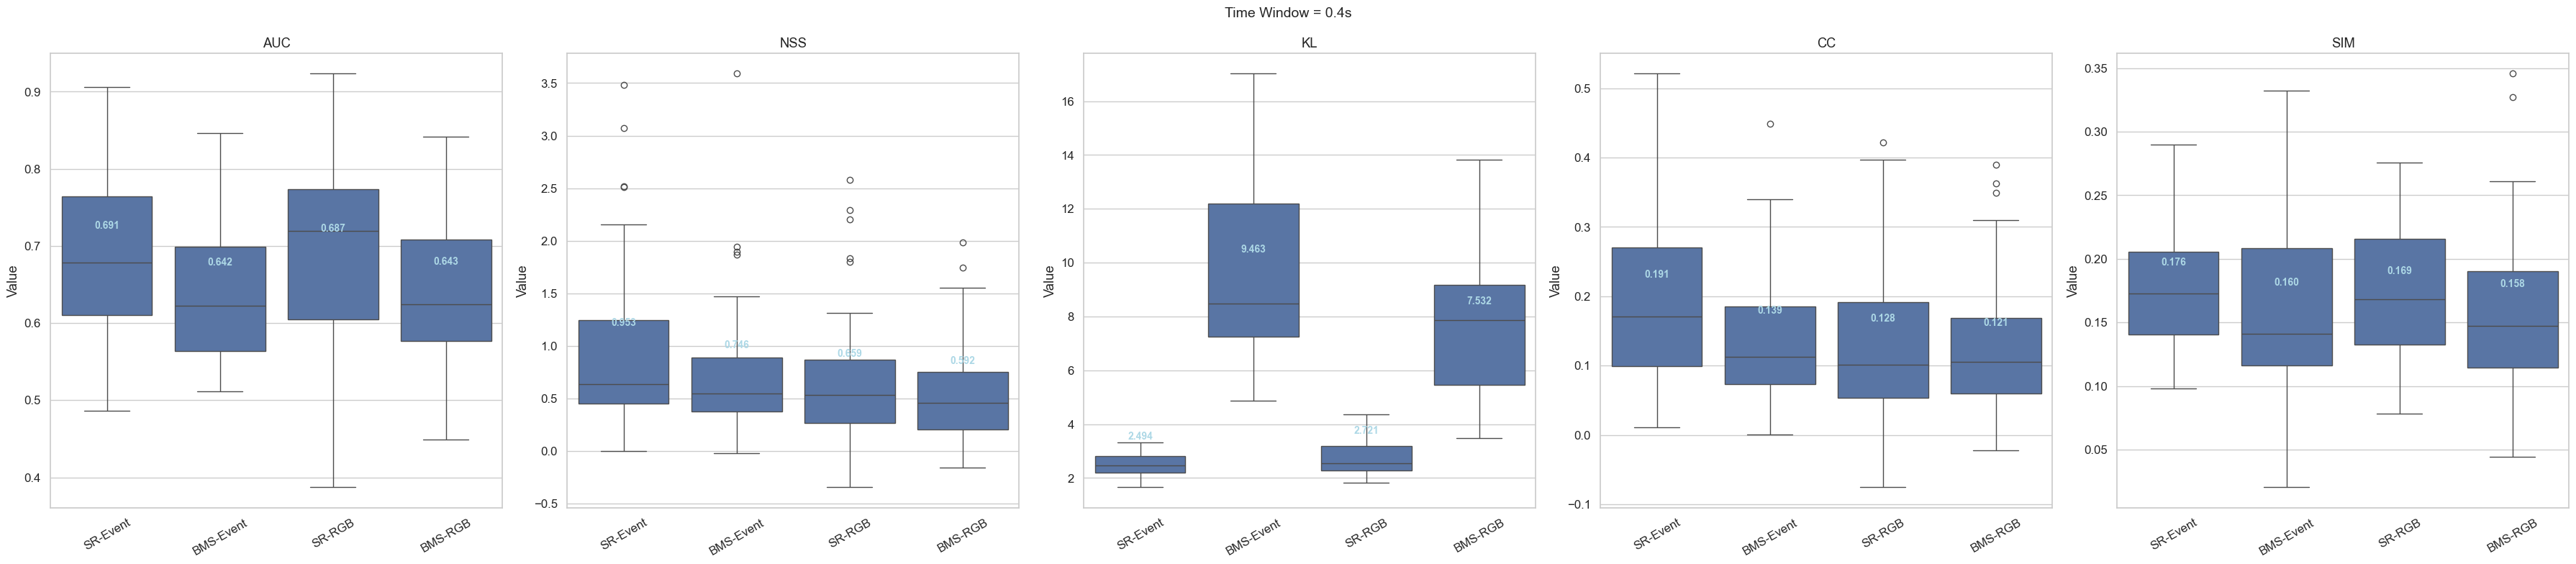

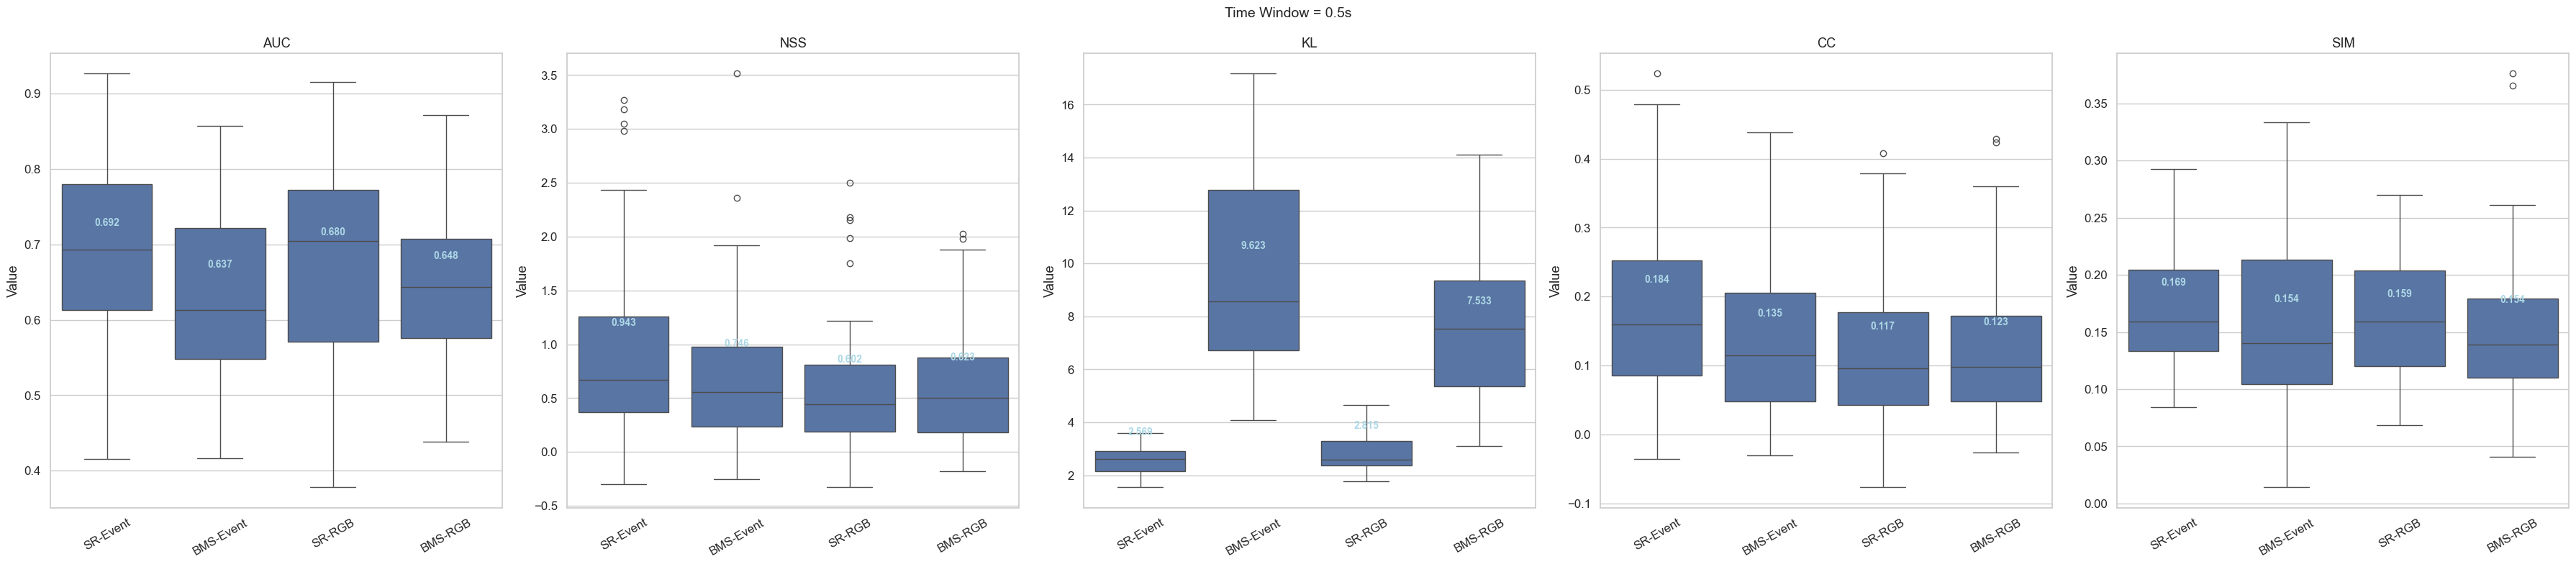

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.1)

methods_order = ['SR-Event', 'BMS-Event', 'SR-RGB', 'BMS-RGB']

for n, df in dfs.items():
    time_window = n * 0.1

    records = []

    for metric in metrics:
        records += [{'Method': 'SR-Event',  'Metric': metric.upper(), 'Value': v} for v in df[f'sr_{metric}']]
        records += [{'Method': 'BMS-Event', 'Metric': metric.upper(), 'Value': v} for v in df[f'bms_{metric}']]
        records += [{'Method': 'SR-RGB',    'Metric': metric.upper(), 'Value': v} for v in df[f'sr_rgb_{metric}']]
        records += [{'Method': 'BMS-RGB',   'Metric': metric.upper(), 'Value': v} for v in df[f'bms_rgb_{metric}']]

    df_long = pd.DataFrame(records)

    fig, axes = plt.subplots(1, 5, figsize=(36, 8), sharey=False)

    for ax, metric in zip(axes, ['AUC', 'NSS', 'KL', 'CC', 'SIM']):
        df_m = df_long[df_long['Metric'] == metric]

        # --------- Vẽ boxplot ----------
        sns.boxplot(
            data=df_m,
            x='Method',
            y='Value',
            order=methods_order,
            ax=ax
        )

        # --------- Vẽ mean và in giá trị đẹp hơn ----------
        y_min, y_max = ax.get_ylim()
        y_range = y_max - y_min

        for i, method in enumerate(methods_order):
            values = df_m[df_m['Method'] == method]['Value']
            mean_val = values.mean()
            median_val = values.median()
            max_val = values.max()


            # Offset đẹp: đặt **trên đỉnh box** (max của box) + 5% của range
            offset = 0.05 * y_range
            ax.text(
                i,
                mean_val + offset,
                f'{mean_val:.3f}',
                ha='center',
                va='bottom',
                fontsize=10,
                color='lightblue',
                fontweight='bold'
            )

        ax.set_title(metric)
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=30)

    fig.suptitle(f'Time Window = {time_window:.1f}s', fontsize=14)
    plt.tight_layout()
    plt.show()
